In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv("train.csv")
display(titanic.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Label Encoding

Sex değişkenini Mean encoding yaparak encode ediniz. Her kategori için Survived değişkeninin ortalamasını kategori adı ile değiştirebilirsiniz. 

IPUCU: pandas groupby ve map fonksiyonlarını kullanabilirsiniz.

In [3]:
#python kodu buraya
df_copy=titanic.copy()
print(df_copy.groupby(["Sex"])["Survived"].mean())
df_copy["Sex"]=df_copy["Sex"].map(df_copy.groupby(["Sex"])["Survived"].mean())
df_copy.head()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0.188908,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.742038,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0.742038,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.742038,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0.188908,35.0,0,0,373450,8.0500,NaN,S


Bindikleri Yer (Embarked) değişkenini sklearn OneHotEncoder objesini kullanarak encode edin.<br>

In [4]:
#python kodu buraya

from sklearn.preprocessing import OneHotEncoder

df_copy=titanic.copy()
df_copy["Embarked"].fillna(df_copy["Embarked"].mode()[0],inplace=True)

onehot = OneHotEncoder(sparse=False)
encoded_features = pd.DataFrame(onehot.fit_transform(df_copy[["Embarked"]]).astype(np.uint8),columns=onehot.categories_[0].tolist())
df_copy.drop(["Embarked"],axis=1,inplace=True)
encoded_features.rename(columns={"C":"Embarked_C","Q":"Embarked_Q","S":"Embarked_S"},inplace=True)
display(pd.concat([df_copy,encoded_features],axis=1).head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1


Cabin değişkenini sklearn LabelEncoder veya OrdinalEncoder objesini kullanarak encode edin.

In [5]:
from sklearn.preprocessing import LabelEncoder

df_copy=titanic.copy()

label=LabelEncoder()
df_copy["Cabin_Encoder"]=0
df_copy.loc[df_copy["Cabin"].isnull(),"Cabin_Encoder"]=-1
df_copy.loc[df_copy["Cabin_Encoder"]==0,"Cabin_Encoder"]=label.fit_transform(df_copy.loc[df_copy["Cabin"].notnull(),"Cabin"])
df_copy.drop(["Cabin"],axis=1,inplace=True)
df_copy.head()

#Nan Değerlerini -1 yaptım olmayanları Label Encoder formatına dönüştürdüm

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Encoder
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,-1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,81
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,-1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,55
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,-1


# Outlier Handling

Fare değişkeni için boxplot çizdiriniz.

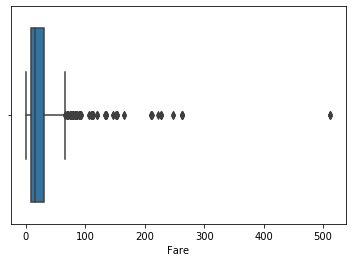

In [6]:
#python kodu buraya
sns.boxplot(titanic["Fare"])

Fare değişkeninedeki outlier değerleri Z-Score kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız. 

In [7]:
sozluk={}
data=pd.DataFrame(df_copy["Fare"].describe())

In [8]:
#python kodu buraya
df_copy=titanic.copy()

from scipy.stats import zscore
z_score = zscore(df_copy["Fare"])
upper = df_copy[z_score<=3]["Fare"].max()
lower= df_copy[z_score>=-3]["Fare"].min()
length_outlier=len(df_copy[(df_copy["Fare"]>upper)|(df_copy["Fare"]<lower)]["Fare"])
print("Sınır Değerleri : ",lower,"|",upper)
print("Outlier Sayısı :",length_outlier)

sozluk["Z_Score"]={"Lower":lower,"Upper":upper,"Length Outlier":length_outlier}

Sınır Değerleri :  0.0 | 164.8667
Outlier Sayısı : 20


Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [9]:
#python kodu buraya
df_copy.loc[z_score>3,"Fare"] = upper
df_copy.loc[z_score<-3,"Fare"] = lower

data=pd.concat([data,pd.DataFrame(data=df_copy["Fare"].describe().values,columns=["Z_Score"],index=df_copy["Fare"].describe().index)],axis=1)

Fare değişkeninedeki outlier değerleri IQR metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [10]:
#python kodu buraya
from scipy.stats import iqr
df_copy=titanic.copy()
q1 = df_copy["Fare"].quantile(0.25)
q3 = df_copy["Fare"].quantile(0.75)
iqr = q3-q1
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)
length_outlier=len(df_copy[(df_copy["Fare"]<lower)|(df_copy["Fare"]>upper)]["Fare"])
print("Sınır Değerleri : ",lower,"|",upper)
print("Oulier Sayısı : ",length_outlier)

sozluk["IQR"]={"Lower":lower,"Upper":upper,"Length Outlier":length_outlier}

Sınır Değerleri :  -26.724 | 65.6344
Oulier Sayısı :  116


Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [11]:
#python kodu buraya
df_copy.loc[(df_copy["Fare"]<lower),"Fare"]=lower
df_copy.loc[(df_copy["Fare"]>upper),"Fare"]=upper

data=pd.concat([data,pd.DataFrame(data=df_copy["Fare"].describe().values,columns=["IQR"],index=df_copy["Fare"].describe().index)],axis=1)

Fare değişkeninedeki outlier değerleri Hard-Edges metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [12]:
#python kodu buraya
df_copy=titanic.copy()
lower = df_copy["Fare"].quantile(q=0.01)
upper = df_copy["Fare"].quantile(q=0.99)
length_outlier = len(df_copy[(df_copy["Fare"]<lower)|(df_copy["Fare"]>upper)]["Fare"])
print("Sınır Değerleri : ",lower,"|",upper)
print("Oulier Sayısı : ",length_outlier)

sozluk["Hard-Edges"]={"Lower":lower,"Upper":upper,"Length Outlier":length_outlier}

Sınır Değerleri :  0.0 | 249.00622000000033
Oulier Sayısı :  9


Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [13]:
#python kodu buraya
df_copy.loc[(df_copy["Fare"]<lower),"Fare"]=lower
df_copy.loc[(df_copy["Fare"]>upper),"Fare"]=upper

data=pd.concat([data,pd.DataFrame(data=df_copy["Fare"].describe().values,columns=["Hard-Edges"],index=df_copy["Fare"].describe().index)],axis=1)

Fare değişkeni için yukarıdaki 3 metodu kullanarak sınır değerler olarak bulduğunuz değerleri ve outlier sayılarını karşılaştırın. Bu değişken için hangisini kullanmak daha mantıklı olabilir?

In [14]:
data=data.loc[["mean","std","min","max"]]
display(pd.DataFrame(sozluk))
display(data)

,Z_Score,IQR,Hard-Edges
Lower,0.0000,-26.7240,0.00000
Upper,164.8667,65.6344,249.00622
Length Outlier,20.0000,116.0000,9.00000


,Fare,Z_Score,IQR,Hard-Edges
mean,32.204208,29.635367,24.046813,31.224767
std,49.693429,35.532019,20.481625,42.524125
min,0.000000,0.000000,0.000000,0.000000
max,512.329200,164.866700,65.634400,249.006220


In [ ]:
# Z_score yönteminde outlier sayısı diğerlerine göre orta ve etkisi de orta derecede oldu.
# IQR yönteminde outlier sayısı fazla olduğundan etkisi de fazla oldu.
# Hard-Edges yönteminde outlier sayısı diğerlerine göre az ve etkisi de az oldu.

#Bu durumda aralarında en ideal Z_score yönteminin olduğunu düşünüyorum :)